# Classificação utilizando SVM com kernel RBF

Exercício para disciplina de Inteligência Computacional (COC361) da UFRJ.

Alunos:
* Gabriel de Oliveira da Fonseca
* Gustavo Pires Machado

## Dataset da Flor Iris

Reune características taxonômicas de diferentes flores a fim de classificá-las de acordo com as suas espécies. São 4 atributos presentes nesse dataset: largura e comprimento das sépalas e pétalas. Abaixo, uma imagem que distingue as 3 diferentes espécies de flores Iris:
 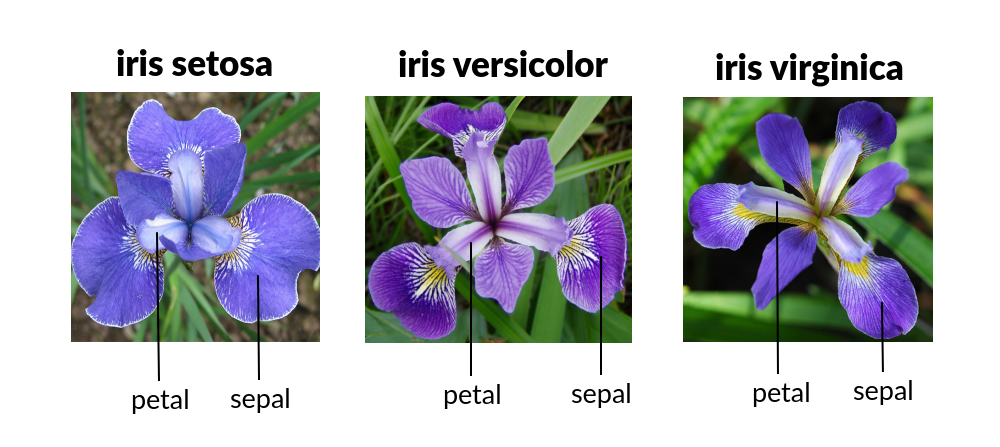

In [ ]:
# Importando dependências e pacotes auxiliares
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib

## Visualização

A fim de compreender melhor o dataset utilizado, iremos plotar alguns gráficos para verificar a distribuição das diferentes classes (espécies).

In [ ]:
# Importando dataset
iris = pd.read_csv('/content/drive/MyDrive/UFRJ/IC/iris.csv')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Sabemos de antemão que o dataset é bem organizado. Como demonstrado abaixo, não há dados faltantes, e temos 50 entradas para cada espécie.

In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris.species.value_counts()

3    50
2    50
1    50
Name: species, dtype: int64

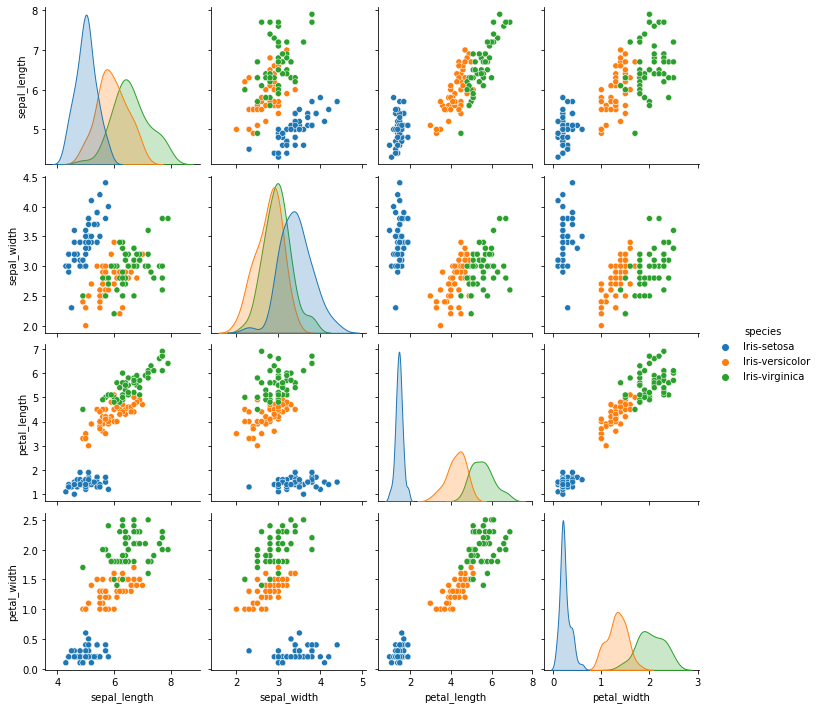

In [ ]:
sns.pairplot(iris, hue="species", height=2.5)

In [ ]:
# Codificando a coluna categórica
iris = iris.replace({"species":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})

Text(0.5, 1.0, 'Correlação entre atributos')

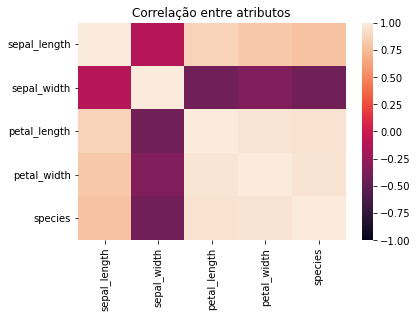

In [ ]:
plt.figure(1)
sns.heatmap(iris.corr(), vmin=-1.0, vmax=1.0)
plt.title('Correlação entre atributos')

A partir da correlação acima, podemos ver que todas os atributos possuem boa correlação com a variável a ser classificada. Portanto, manteremos todas, mesmo algumas possuindo forte correlação entre si.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
# Removendo a variável alvo do dataset.
x = iris.drop('species', axis=1)
y= iris.species

In [ ]:
# Separando o dataset conjuntos de teste e treinamento.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Análise dos hiperparâmetros

### Hiperparâmetro C

É um parâmetro de regularização da SVM, e define a margem utilizada pelo modelo para determinar o quanto de erro é aceitável. Isso permite controlar a troca entre a fronteira de decisão e o termo de classificação errônea. Quando C estiver alto, o modelo classificará um número maior de pontos, o que também pode ocasionar perda de acurácia e overfitting.

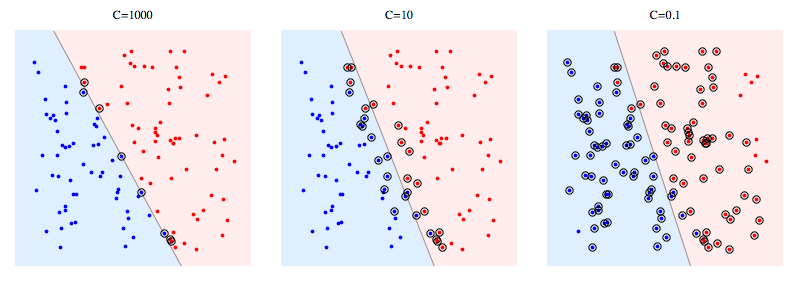

### Hiperparâmetro Gamma

Define o quanto a distância entre os pontos influencia o cálculo dos hiperplanos. Quanto maior for Gamma, mais influência possuem pontos próximos e maior a probabilidade de overfitting. Por outro lado, quanto menor for Gamma, maior a influência de pontos mais distantes e mais generalista o modelo.

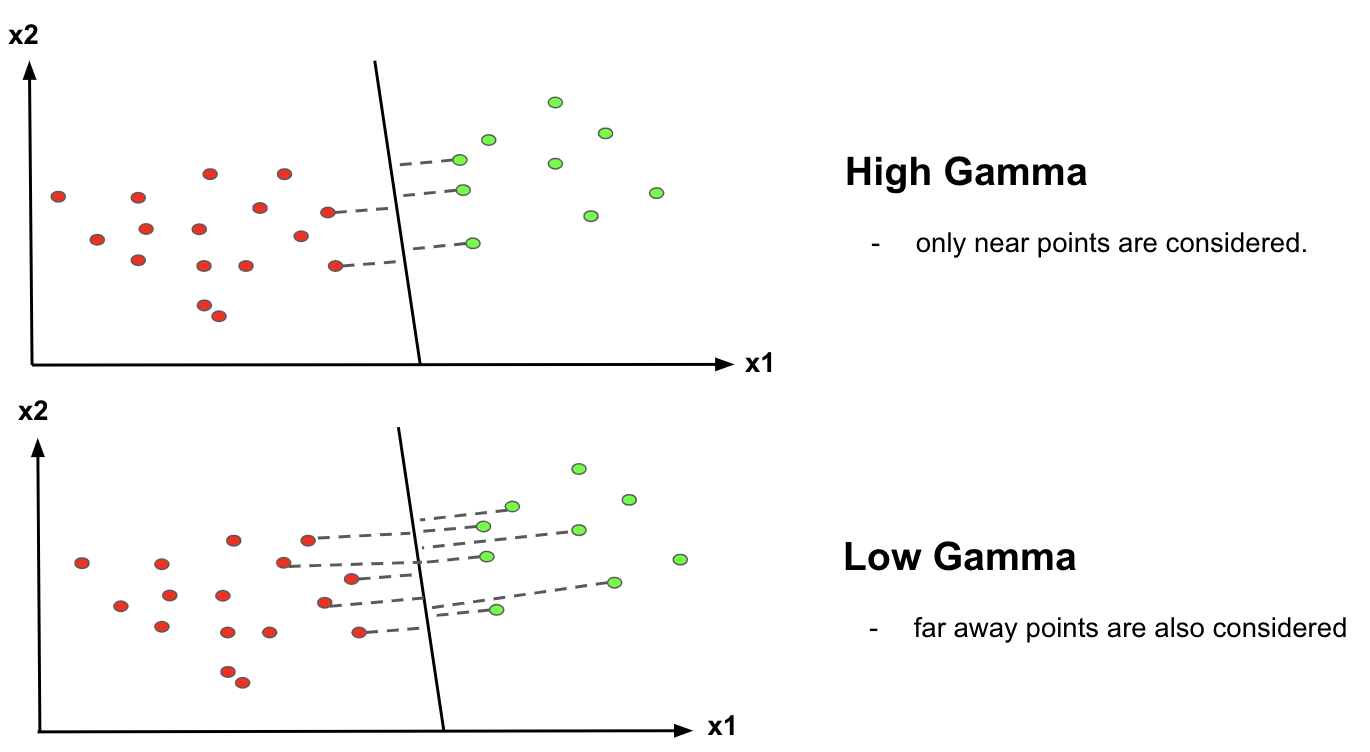


Utilizaremos a ferramenta GridSearchCV para otimizar os hiperparâmetros do SVM.

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=10)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [ ]:
results_df = pd.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
17,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}",1,0.988889,0.033333
23,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",1,0.988889,0.033333
11,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",1,0.988889,0.033333
24,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",4,0.966667,0.050918
22,"{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}",4,0.966667,0.050918
18,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",4,0.966667,0.050918
5,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",4,0.966667,0.050918
16,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",4,0.966667,0.050918
10,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",4,0.966667,0.050918
21,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}",10,0.955556,0.073703


In [ ]:
grid.best_estimator_

SVC(C=10, gamma=0.1)

Chegamos à conclusão, portanto, de que a melhor combinação de parâmetros é C=10 e Gamma = 0.1.

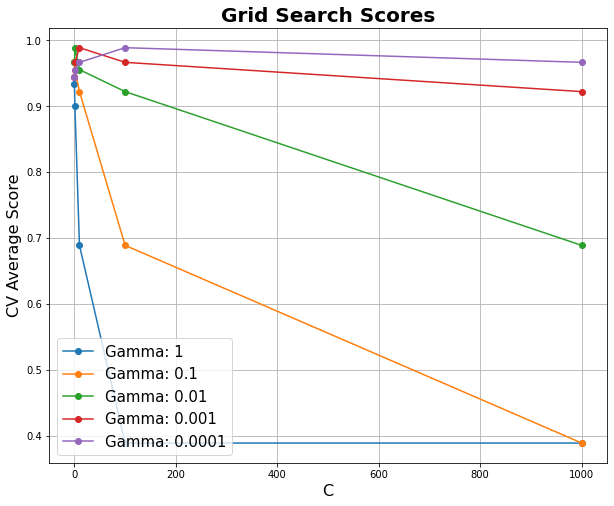

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

# Adaptado de https://stackoverflow.com/a/43645640/11998835
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

plot_grid_search(grid.cv_results_, param_grid['C'], param_grid['gamma'], 'C', 'Gamma')

In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma=.1, C=10.0)
svm.fit(x_train, y_train)

print('A acurácia do classificador SVM no conjunto de treino foi {:.2f} de 1'.format(svm.score(x_train, y_train)))

print('A acurácia do classificador SVM no conjunto de teste foi {:.2f} de 1'.format(svm.score(x_test, y_test)))

A acurácia do classificador SVM no conjunto de treino foi 0.99 de 1
A acurácia do classificador SVM no conjunto de teste foi 0.97 de 1
